https://www.kaggle.com/uciml/mushroom-classification

# mushroom data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("../data/mushroom.csv")
#8124종류의 버섯들을 22개의 특성과 함께 독이 있는지를 기록한 데이터

In [3]:
data.shape

(8124, 23)

In [4]:
#data.head()

In [5]:
#data.info()

In [6]:
#간단한 요약정보를 볼 수 있다.
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
#문제와 답으로 데이터 나누기
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [8]:
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

### 꼭 수치데이터야만 학습이 가능하다

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [21]:
"""범주형 데이터는 학습 할 수 없다"""
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'k'

# LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoder 예시문제
#--------------
labelEncoder = LabelEncoder()
labelEncoder.fit(["a", "a", "b", "c"])
print("학습시킨 데이터 class :",list(labelEncoder.classes_))
print("바뀐 데이터 :",labelEncoder.transform(["b", "b", "a"]) )
print("숫자를 다시 문자로 :",list(labelEncoder.inverse_transform([2, 2, 1])))
#-------------------

학습시킨 데이터 class : ['a', 'b', 'c']
바뀐 데이터 : [1 1 0]
숫자를 다시 문자로 : ['c', 'c', 'b']


## 정답 수치형으로 바꾸기 (LabelEncoder or map)

In [11]:
"""첫 번째 방법 : LabelEncoder 활용"""
le = LabelEncoder()
y = le.fit_transform(y)
y[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [12]:
"""두 번째 방법 : map 활용"""
target_dic = {'p':0, 'e':1}
y = y.map(target_dic)
y.head(2)

AttributeError: 'numpy.ndarray' object has no attribute 'map'

## one-hot-encoding

In [ ]:
pd.get_dummies(['a','b','c','a'])

In [13]:
pd.get_dummies(['a','b','c'],prefix="abc")

,abc_a,abc_b,abc_c
0,1,0,0
1,0,1,0
2,0,0,1


In [14]:
pd.get_dummies(X.loc[:,"cap-shape"])

,b,c,f,k,s,x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
8119,0,0,0,1,0,0
8120,0,0,0,0,0,1
8121,0,0,1,0,0,0
8122,0,0,0,1,0,0


In [15]:
X=pd.get_dummies(X,prefix=X.columns)

In [16]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [18]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train,y_train)
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 1.0
test 모델 :  1.0


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 1.0
test 모델 :  1.0


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 1.0
test 모델 :  1.0


## 특성 중요도 확인하기

In [21]:
"""
특성 중요도feature importance입니다. 
이 값은 0과 1 사이의 숫자로, 
각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 
1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다.
참고로 특성 중요도의 전체 합은 1입니다.
"""
model.feature_importances_
#model.feature_importances_.sum()

array([0.00000000e+00, 6.56213385e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.61971282e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.29747201e-03, 0.00000000e+00, 2.33702651e-02, 0.00000000e+00,
       0.00000000e+00, 2.59052638e-02, 0.00000000e+00, 6.12442126e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.58075468e-03,
       1.65012192e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.77292099e-01, 0.00000000e+00, 8.48584999e-02,
      

In [22]:
import_list = list(zip(model.feature_importances_,X.columns))
import_list.sort()
import_list.reverse()

In [23]:
import_list[:5]#odor : 냄새

[(0.612442126153412, 'odor_n'),
 (0.17729209900054727, 'stalk-root_c'),
 (0.08485849985152903, 'stalk-root_r'),
 (0.03504861063759017, 'spore-print-color_r'),
 (0.030912481326547, 'stalk-surface-below-ring_y')]

- odor_n : 냄새 없음
- stalk-root_c : 자루 곤봉모양
- stalk-surface-below-ring_y : 자루 표면 아래 자루테가 비늘모양

In [24]:
features = pd.DataFrame(import_list, columns=["score","feature"])
features = features.iloc[:10]

<BarContainer object of 10 artists>

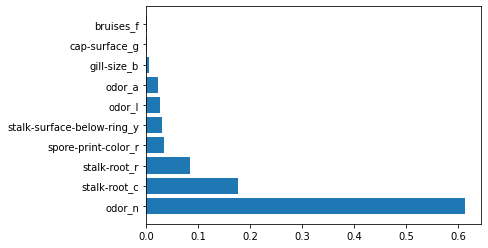

In [25]:
plt.barh(features.feature,features.score)

# RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
#n_estimators:트리의 개수
#max_depth : 트리의 깊이 10보다 더 낮추면 과소적합되어 점수가 떨어짐
model = RandomForestClassifier(n_estimators=20, max_depth=10,random_state=1)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=1)

In [28]:
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 1.0
test 모델 :  1.0


In [29]:
import_list = list(zip(model.feature_importances_,X.columns))
import_list.sort()
import_list.reverse()
import_list[:5]#odor : 냄새

[(0.10570050288738186, 'odor_f'),
 (0.09287387686127477, 'odor_n'),
 (0.060457804823172825, 'spore-print-color_h'),
 (0.05524206880425049, 'gill-size_b'),
 (0.050626706279486344, 'gill-spacing_c')]

# GradientBoosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
#n_iter_no_change:조기종료
#validation_fraction=0.1(기본값)기준 검증 점수가 올라가지 않으면 훈련종료
#n_iter_no_change가 3이라면 3번동안 올라가지 않으면 조기종료
model = GradientBoostingClassifier(n_estimators=50, n_iter_no_change=3)
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, n_iter_no_change=3)

In [32]:
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 0.9996717544723454
test 모델 :  0.999507631708518


# XGboost 설치부터

In [33]:
!pip install xgboost

     |████████████████████████████████| 1.1 MB 498 kB/s eta 0:00:01


In [35]:
from xgboost import XGBClassifier

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/choi/.pyenv/versions/dsml/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/choi/.pyenv/versions/3.8.3/envs/dsml/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [54]:
model = XGBClassifier()
model.fit(X_train,y_train)
print("train 모델 :",model.score(X_train, y_train))
print("test 모델 : ",model.score(X_test,y_test))

train 모델 : 1.0
test 모델 :  1.0


xgboost 하이퍼파라메터 수정

https://docs.aws.amazon.com/ko_kr/sagemaker/latest/dg/xgboost_hyperparameters.html
https://www.kaggle.com/lifesailor/xgboost